# Alkaloid targeted extraction

**Author:** Daniel Quiroz and Jessica Cooperstone

**Date:** 07/28/2023

## Goal of this report

This report has the objective of targeted extract the relative abundance of dehydrotomatine, alpha-tomatine, tomatidine, Hydroxytomatine, Acetoxytomatine, Esculeoside B, and (Lycoperoside F, G or Esculeoside A) present in tomato leave samples.

## Loading libraries

In [1]:
# ms-mint: Instance for MS spectrometry data
from ms_mint.Mint import Mint
import pandas as pd # Data wrangling
import numpy as np
import re # Regular expresions
import glob # listing files
import seaborn as sns
import plotly.express as px # Interactive plots
import pickle # Export python object
#from ms_mint.notebook import Mint
mint = Mint()

## Selecting files

In [2]:
all_files = glob.glob("Data/*.mzML") # Listing all files under data directory
regex = re.compile('Data/Condit*') # Creating a regex expresion
files_noCondQC = [i for i in all_files if not regex.match(i)] # Removing conditioning QC

regex = re.compile('Data/QC*') # Creating a regex expresion
files_noCondQC = [i for i in files_noCondQC if not regex.match(i)] # Removing  QC

# Removing blanks
regex_blank = re.compile("Data/*Blank*")
files_noBlank = [i for i in files_noCondQC if not regex_blank.match(i)] 
files_noBlank

regex_blank = re.compile("Data/ProcessBlank*")
files_noBlank = [i for i in files_noBlank if not regex_blank.match(i)] 
files_noBlank

mint.ms_files = files_noBlank # Final sample table
mint.ms_files[10:35] # only 25 files displayed

['Data/SPV_7_pos_17.mzML',
 'Data/SPV_8_pos_28.mzML',
 'Data/SPV_9_pos_67.mzML',
 'Data/SPV_10_pos_53.mzML',
 'Data/OH8243Fruit_1_pos_229.mzML',
 'Data/HATS_1_pos_65.mzML',
 'Data/HATS_2_pos_185.mzML',
 'Data/HATS_3_pos_70.mzML',
 'Data/HATS_4_pos_78.mzML',
 'Data/HATS_5_pos_71.mzML',
 'Data/HATS_6_pos_48.mzML',
 'Data/HATS_7_pos_22.mzML',
 'Data/HATS_8_pos_84.mzML',
 'Data/HATS_9_pos_66.mzML',
 'Data/HATS_10_pos_54.mzML',
 'Data/LA_1_pos_175.mzML',
 'Data/LA_2_pos_87.mzML',
 'Data/LA_3_pos_38.mzML',
 'Data/LA_4_pos_42.mzML',
 'Data/LA_5_pos_127.mzML',
 'Data/LA_6_pos_64.mzML',
 'Data/LA_7_pos_86.mzML',
 'Data/LA_8_pos_170.mzML',
 'Data/LA_9_pos_171.mzML',
 'Data/LA_10_pos_95.mzML']

Now that we have all the samples we would like to extract peak areas, we can load the table of the compounds or alkaloids we are interested on.

## Loading extraction targets

In [18]:
mint.load_targets('targets.csv')
mint.targets

,mz_mean,mz_width,rt,rt_min,rt_max,rt_unit,intensity_threshold,target_filename
peak_label,,,,,,,,
Dehydrotomatine,1034.5422,5,316,314,319,s,4000,targets.csv
alpha-Tomatine,1036.5613,5,322,318,325,s,4000,targets.csv
Tomatidine,416.3531,5,414,410,418,s,4000,targets.csv
Hydroxytomatine_range,1050.5500,5,180,120,240,s,4000,targets.csv
Acetoxytomatine_II_rt4p4,1092.5608,5,263,260,267,s,4000,targets.csv
Acetoxytomatine_II_rt5p3,1092.5608,5,319,318,323,s,4000,targets.csv
Acetoxytomatine_II_rt5p4,1092.5608,5,324,323,327,s,4000,targets.csv
EsculeosideB_rt2p2,1228.5957,10,132,130,136,s,1000,targets.csv
EsculeosideB_rt2p3,1228.5957,10,141,138,144,s,1000,targets.csv


## Running targeted extraction

In [4]:
 mint.run()  # Run and save on memery
# mint.run(fn = "Results/results") # run and save on file (This option won't have the results load on memory)

## Peak shapes

In [19]:
mint.results[['ms_file', 'mz_mean','peak_label', "peak_area"]].head()

,ms_file,mz_mean,peak_label,peak_area
0,Data/SPM_7_pos_20.mzML,1034.5422,Dehydrotomatine,1425829.0
1,Data/SPM_7_pos_20.mzML,1036.5613,alpha-Tomatine,5211881.0
2,Data/SPM_7_pos_20.mzML,416.3531,Tomatidine,0.0
3,Data/SPM_7_pos_20.mzML,1050.5500,Hydroxytomatine_range,29659.0
4,Data/SPM_7_pos_20.mzML,1092.5608,Acetoxytomatine_II_rt4p4,0.0


## Peak shapes

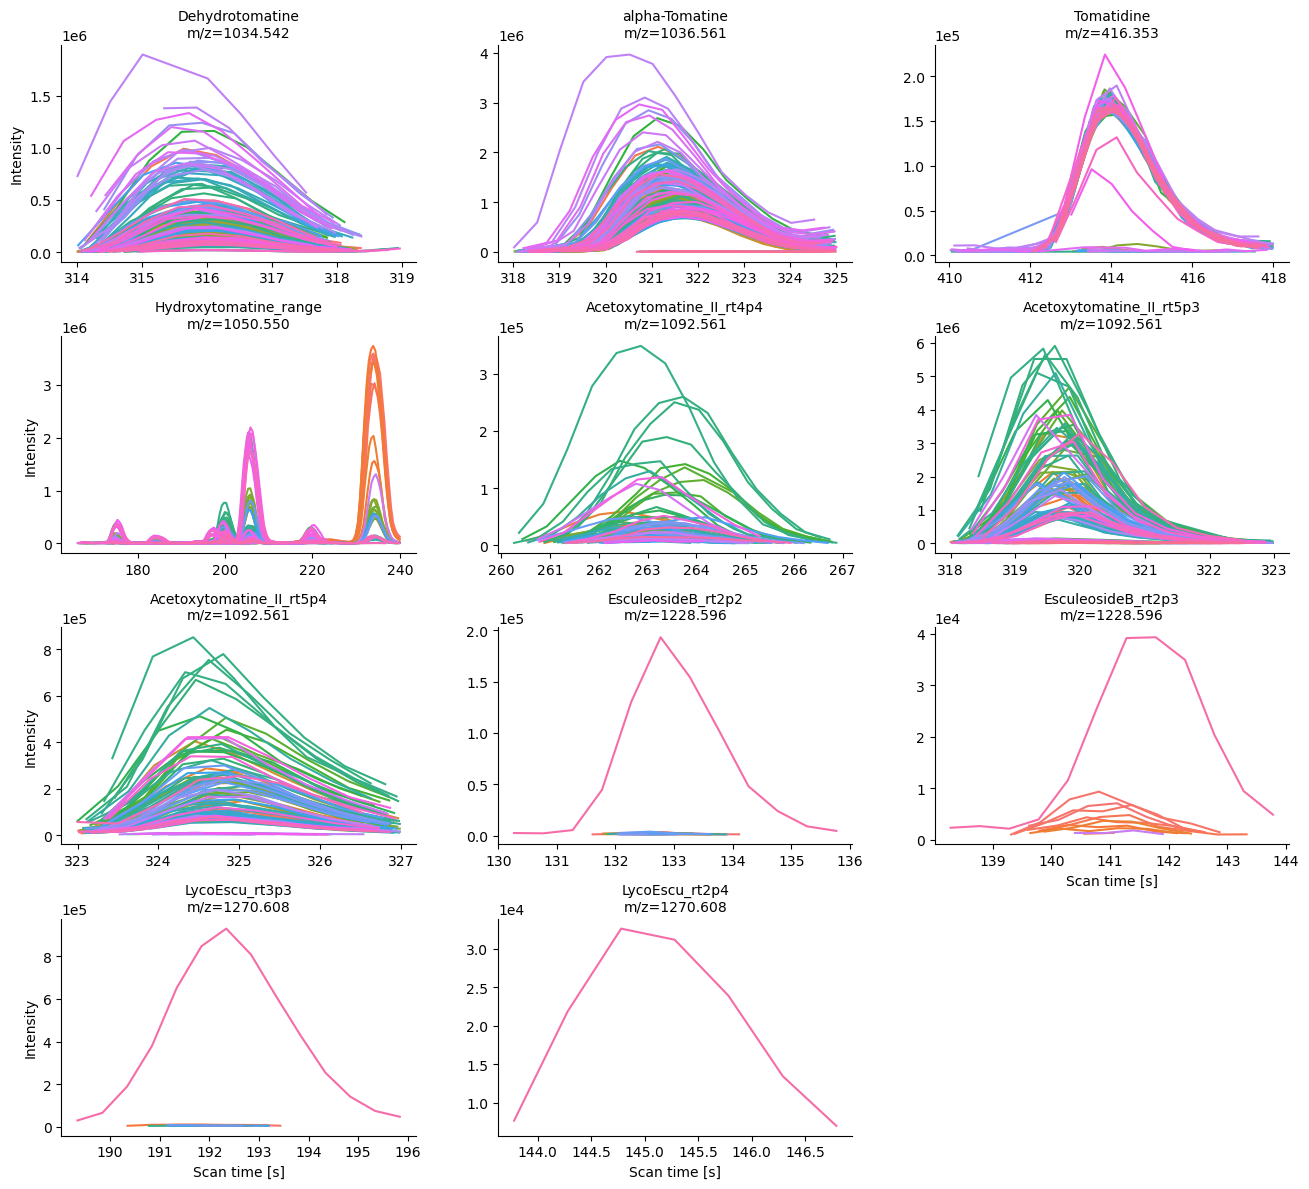

In [6]:
mint.plot.peak_shapes(col_wrap=3)

We see the peaks for all the samples, is easy to see that there is a big range of peaks between all the peaks shown per alkaloid.

## Data visualization

### Preparing the data

In [7]:
# Extracting quant table
results_pd = pd.DataFrame(mint.results)
### Exporting the final data
results_pd.to_csv('Results/All_samples_results.csv')


sample_info = results_pd['ms_file_label'].str.split("_", expand = True)
results_pd["Sample"] = sample_info[0] # Assigning Specie Name

#results_csv["Replicate"] = sample_info[1] # Assigning Replicate number
#results_csv['Mode'] = sample_info[2] # Assigning ionization mode
#results_csv['Injection'] = sample_info[3] # Assigning injection number

In [8]:
results_tiny = results_pd[['ms_file_label', 'peak_label', 'mz_mean', 'peak_area', "Sample"]]
results_tiny.head()

,ms_file_label,peak_label,mz_mean,peak_area,Sample
0,SPM_7_pos_20,Dehydrotomatine,1034.5422,1425829.0,SPM
1,SPM_7_pos_20,alpha-Tomatine,1036.5613,5211881.0,SPM
2,SPM_7_pos_20,Tomatidine,416.3531,0.0,SPM
3,SPM_7_pos_20,Hydroxytomatine_range,1050.5500,29659.0,SPM
4,SPM_7_pos_20,Acetoxytomatine_II_rt4p4,1092.5608,0.0,SPM


In [21]:
results_tiny.to_csv('Results/All_samples_fixed_rt.csv')

### Getting the average peak area per group (specie)

In [22]:
results_group = results_tiny.groupby(['Sample', 'peak_label'], as_index = False).agg({'peak_area':['mean', 'std']})
results_group.columns = ['Sample', 'Alkaloid', 'peak_area_average','std']
results_group = results_group.sort_values(['Alkaloid', 'peak_area_average'])
results_group.head()

,Sample,Alkaloid,peak_area_average,std
22,OH,Acetoxytomatine_II_rt4p4,0.0,0.000000
88,SCR,Acetoxytomatine_II_rt4p4,5258.9,12995.774155
132,SLB,Acetoxytomatine_II_rt4p4,15963.4,35075.878306
11,LA,Acetoxytomatine_II_rt4p4,21597.7,47044.656369
165,SPE,Acetoxytomatine_II_rt4p4,22927.7,72503.753509


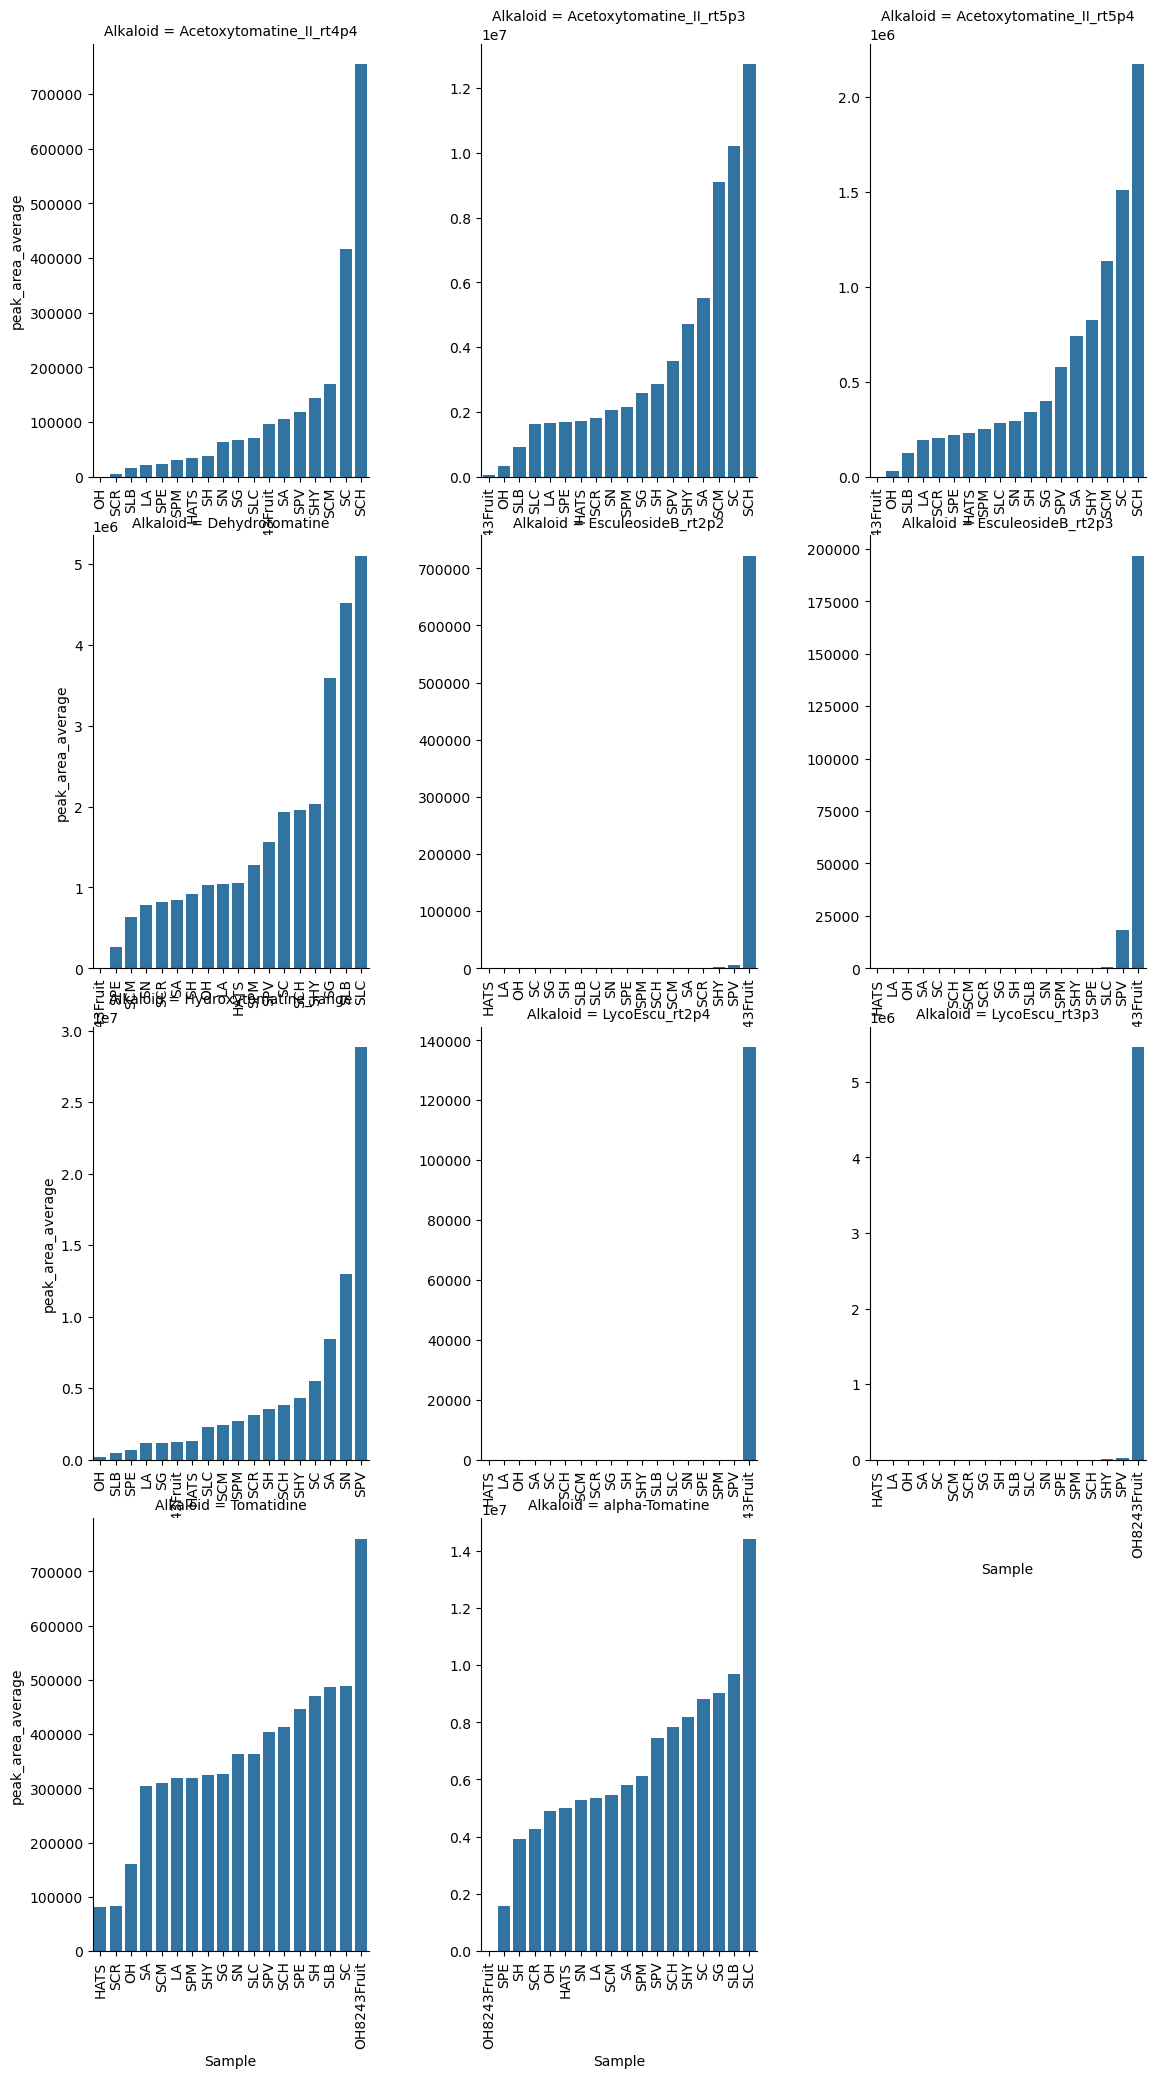

In [23]:
barplot_group = sns.FacetGrid(results_group, col = 'Alkaloid', col_wrap=3,
                              height=5, sharey = False, sharex = False, aspect = 0.8)

barplot_group = barplot_group.map_dataframe(sns.barplot, x = 'Sample', y = "peak_area_average")

for axes in barplot_group.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

## Hetmap

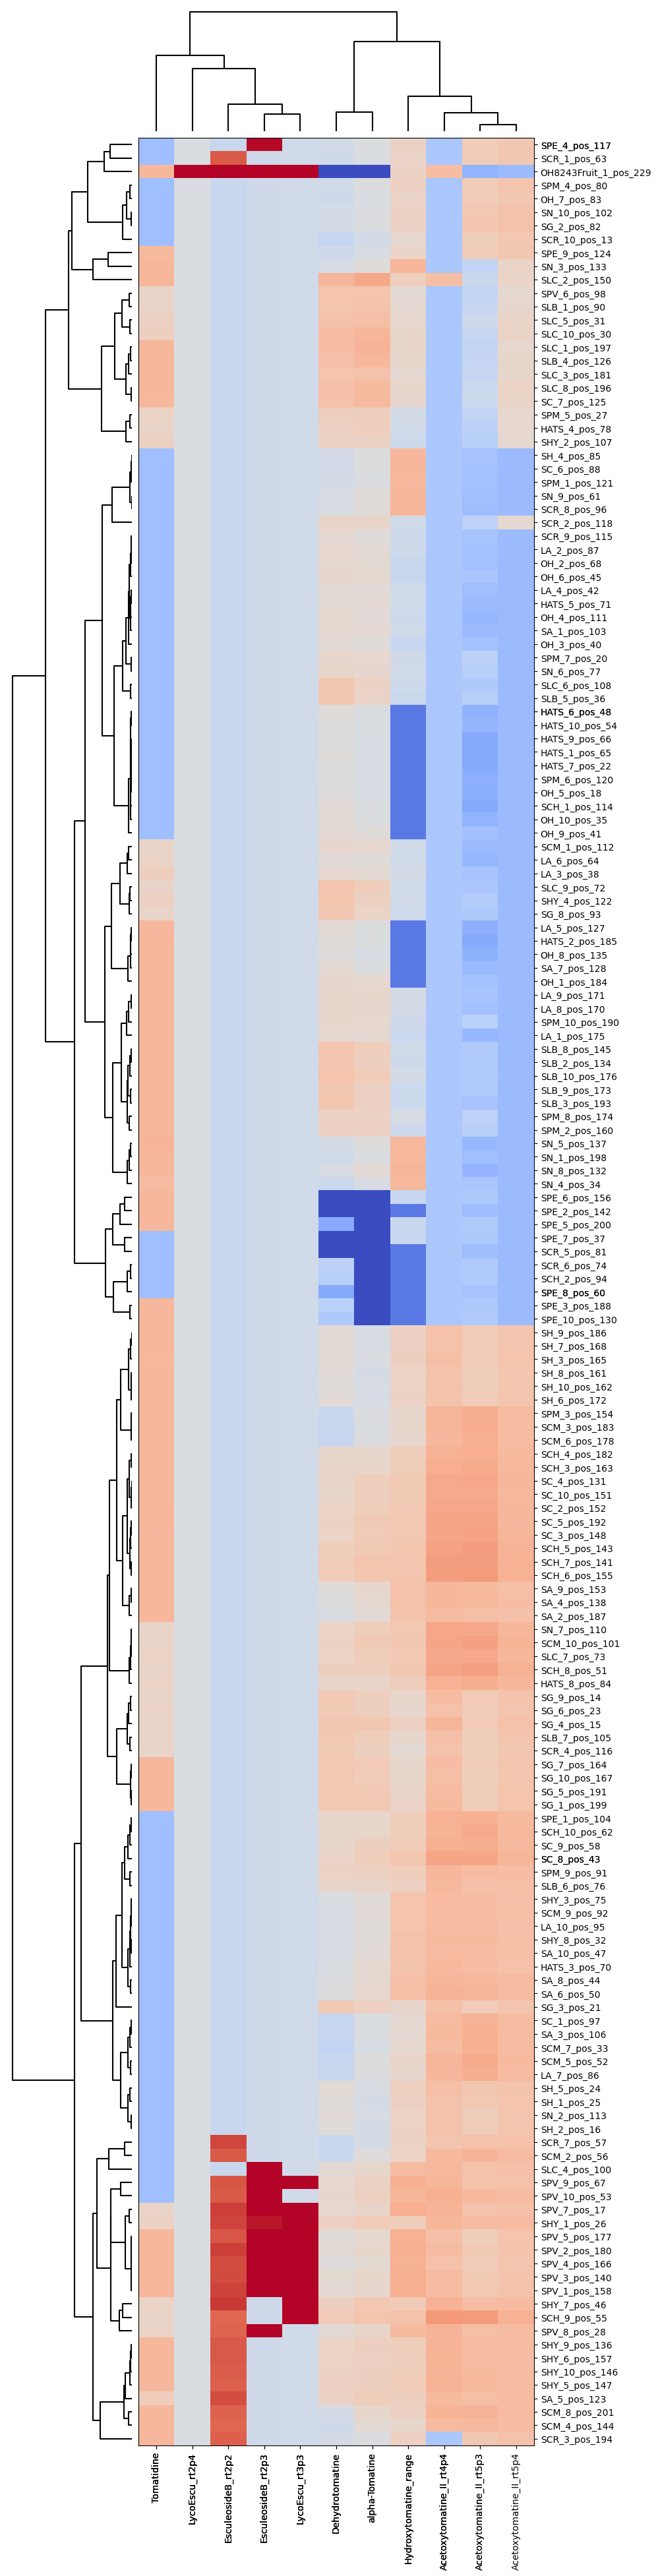

In [20]:
mint.plot.hierarchical_clustering(
    data=None,
    peak_labels= None,
    ms_files =None,
    targets_var="peak_max",
    vmin=-3,  # Minimum value for color bar
    vmax=3,  # Maximum value for color bar
    xmaxticks=None,  # Maximum number of x-ticks to display
    ymaxticks=None,  # Maximum number of y-ticks to display
   # transform_func="log2p1",
    metric="cosine",
    figsize = (8, 37)
)

## PCA

In [13]:
mint.pca.run(n_components = 5)

<Figure size 640x480 with 0 Axes>

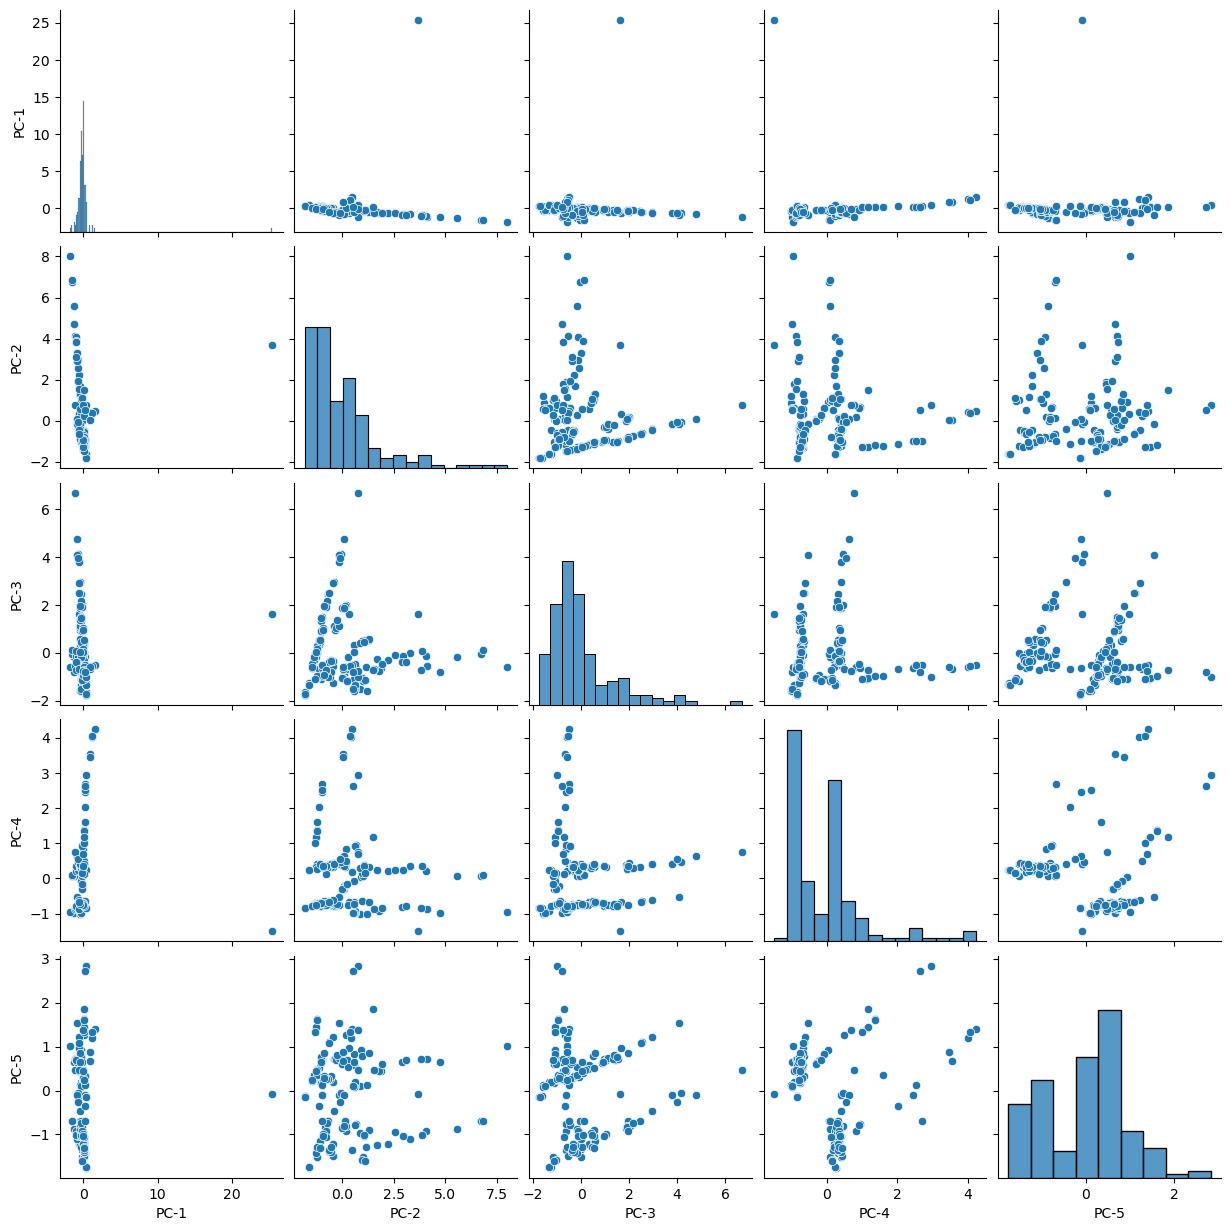

In [14]:
mint.pca.plot.pairplot(n_components=5, interactive=False)

## Exporting ms-mint object

In [17]:
# Export ms-mint results as picle object
pickle.dump(mint, open("Results/mint_object.pickle", "wb") )
# Load picle object
#mint = pickle.load(open("Results/mint_object.pickle", "rb") )